# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Import dependencies:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import statistics
import numpy as np
import pandas as pd
import scipy.stats as sts

# File to Load (Remember to change these)
city_data_df = pd.read_csv("/Users/diegoperezo97/Documents/Tecnológico de Monterrey – Data Analytics Boot Camp/pyber-analysis/Module 5/Challenge 5/Resources/city_data.csv")
ride_data_df = pd.read_csv("/Users/diegoperezo97/Documents/Tecnológico de Monterrey – Data Analytics Boot Camp/pyber-analysis/Module 5/Challenge 5/Resources/ride_data.csv")

In [2]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


### Merge the DataFrames

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [5]:
#  1. Get the total rides for each city type: Use the groupby() function to create a Series of data that has the 
# type of city as the index, then apply the count() method to the "ride_id" column:
q1_1 = pyber_data_df.groupby("type").count()["ride_id"]
q1_1

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
# 2. Get the total drivers for each city type: Use the groupby() function to create a Series of data that has the 
# type of city as the index, then apply the sum() method to the "driver_count" column:
q1_2 = city_data_df.groupby("type").sum()["driver_count"]
q1_2

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
#  3. Get the total amount of fares for each city type: Use the groupby() function to create a Series of data that 
# has the type of city as the index, then apply the sum() method to the "fare" column:
q1_3 = pyber_data_df.groupby("type").sum()["fare"]
q1_3

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
#  4. Get the average fare per ride for each city type: Calculate the average fare per ride by city type by 
# dividing the sum of all the fares by the total rides:
q1_4 = pyber_data_df.groupby("type").mean()["fare"]
q1_4

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [9]:
# 5. Get the average fare per driver for each city type: Calculate the average fare per driver by city type by 
# dividing the sum of all the fares by the total drivers:
q1_5 = pyber_data_df.groupby("type").sum()["fare"] / city_data_df.groupby("type").sum()["driver_count"]
q1_5

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [10]:
#  6. Create a PyBer summary DataFrame: Create a PyBer summary DataFrame with all the data gathered from Steps 1-5, 
# using the column names shown below:
pyber_summary_df = pd.DataFrame({
          "total_rides": q1_1,
          "total_drivers": q1_2,
          "total_amount": q1_3,
          "average_fare_per_ride": q1_4,
          "average_fare_by_driver": q1_5})

In [11]:
#  7. Cleaning up the DataFrame. Delete the index name:
pyber_summary_df.index.name = None

In [12]:
#  8. Format the columns:
pyber_summary_df["total_rides"] = pyber_summary_df["total_rides"].map("{:.0f}".format)
pyber_summary_df["total_drivers"] = pyber_summary_df["total_drivers"].map("{:.0f}".format)
pyber_summary_df["total_amount"] = pyber_summary_df["total_amount"].map("${:.2f}".format)
pyber_summary_df["average_fare_per_ride"] = pyber_summary_df["average_fare_per_ride"].map("${:.2f}".format)
pyber_summary_df["average_fare_by_driver"] = pyber_summary_df["average_fare_by_driver"].map("${:.2f}".format)

In [13]:
pyber_summary_df

,total_rides,total_drivers,total_amount,average_fare_per_ride,average_fare_by_driver
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.50
Urban,1625,2405,$39854.38,$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [14]:
# 1. Read the merged DataFrame:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date:
q2_2 = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
q2_2

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [16]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index():
q2_3 = q2_2.reset_index()
q2_3

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [17]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date:
q2_4 = pd.pivot_table(q2_3, values="fare", index="date", columns="type", aggfunc=np.sum)
q2_4

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [18]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29':
q2_5 = q2_4.loc["2019-01-01":"2019-04-29"]
q2_5

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [19]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8:
# df.index = pd.to_datetime(df.index)
q2_5.index = pd.to_datetime(q2_5.index)
q2_5

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [20]:
# 7. Check that the datatype for the index is datetime using df.info():
q2_5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [21]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week:
q2_8 = q2_5.resample("W").sum()
q2_8.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


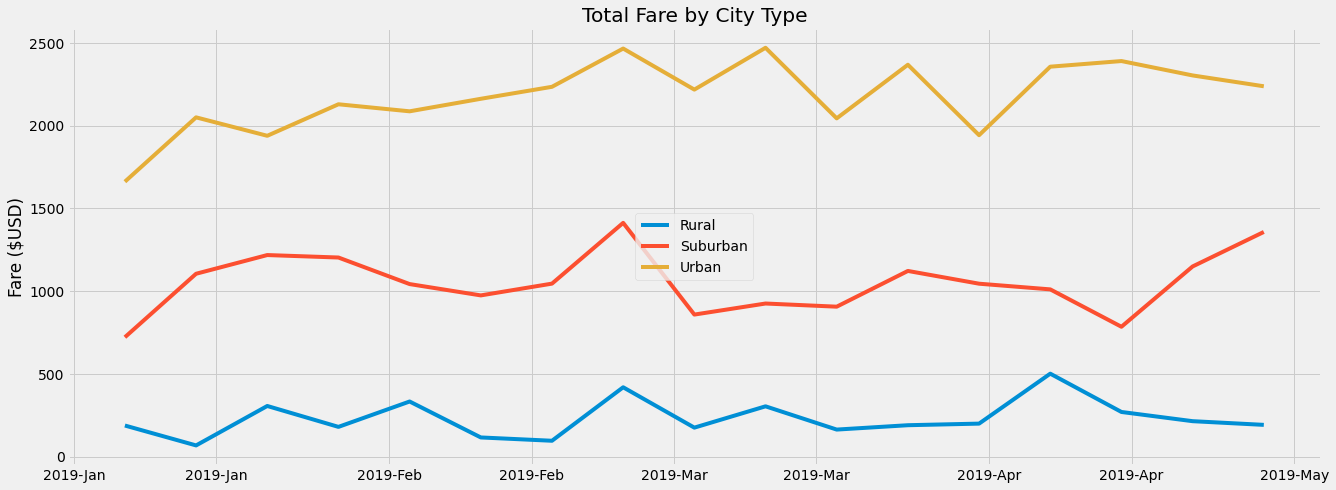

In [22]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function:

# Import the style from Matplotlib:
from matplotlib import style
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# Use the graph style fivethirtyeight:
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(20, 7.5))
ax.plot(q2_8, label=q2_8.columns)
ax.set_title("Total Fare by City Type")
ax.set_xlabel(None)
ax.set_ylabel("Fare ($USD)")
ax.legend(loc="center")

# Define the date format
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%b"))

# Save figure as "PyBer_fare_summary.png":
plt.savefig("/Users/diegoperezo97/Documents/Tecnológico de Monterrey – Data Analytics Boot Camp/pyber-analysis/Module 5/Challenge 5/Analysis/PyBer_fare_summary.png")

plt.show()